<a href="https://colab.research.google.com/github/DebjitHore/Jovian_ML_DataAnalysiswithPython/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zerotopandas-course-project-starter')
jovian.set_colab_id('1tEGIVuqx7NnSJQDb8uD0TgjHKDMoyFod')

# Project Title - Census Data_DistrictWise_India

The dataset contains census data for India, taken district wise in 2001. The data has been taken from Kaggle via the url that will be mentioned below. The aim is to apply whatever knowledge I learned throught the Jovian: Zero to Pandas course to perform EDA to look for any trends in the data. The tools I will be using are mostly NumPy, Pandas, Matplotlib and Seaborn

## Downloading the Dataset

The dataset has been downloaded from Kaggle in CSV format from the link mentioned below.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/bazuka/census2001' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debjithore
Your Kaggle Key: ··········


100%|██████████| 146k/146k [00:00<00:00, 52.4MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './census2001'

In [ ]:
import os
os.listdir(data_dir)

['all.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "indian-census-study-project-debjithore" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debjithore/indian-census-study-project-debjithore


'https://jovian.ai/debjithore/indian-census-study-project-debjithore'

## Data Preparation and Cleaning

The CSV data was loaded into a Pandas dataframe. The only cleaning operation that was done was conveniently removing the NaN values with 0 to make plotting and other operations easier



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns
sns.set(color_codes=True)
%cd census2001
census_data= pd.read_csv('all.csv', encoding='unicode_escape', engine='python')
census_data.tail()

/content/census2001/census2001/census2001


,Unnamed: 0,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,...,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
585,586,WB,"District Puruliya (14), West Bengal (19)",2536516,1298078,1238438,13.96,2281090,NaN,NaN,NaN,449895.0,6.0,954.0,964.0,463452,18.27,1182284,803494,378790,55.57,73.72,36.50,1182284.0,30730.0,428648.0,276749.0,229429.0,166519.0,49425.0,269944.0,630803.0,1449836.0,185933.0,1127488,645506,481982,1409028,1.Bauri,209080.0,...,3.Rajwar,40333.0,1.Hindus,2116037,2.Others,226912,3.Muslims,180694,1.Santal,303321,2.Bhumij,94028,3.Kora,21690,1.Puruliya (M),113806.0,2.Adra (CT),22031.0,3.Raghunathpur (M),21932.0,2468.0,2452.0,2443.0,1232.0,1201,6,2135.0,270,195,6,1173,66,157,563.0,651,778,2361,26.3,44.8,28.9
586,587,WB,District Medinipur,9610788,4916370,4694418,15.68,8626883,NaN,NaN,NaN,1827721.0,5.0,955.0,951.0,798684,8.31,6164316,3573623,2590693,74.90,84.91,64.42,6164316.0,86179.0,2465907.0,1586123.0,1034942.0,743625.0,246415.0,918006.0,2333062.0,5656043.0,703677.0,3751057,2530112,1220945,5859731,1.Bagdi etc.,369882.0,...,3.Rajbanshi,132511.0,1.Hindus,8224779,2.Muslims,1088618,3.Others,262578,1.Santal,503899,2.Bhumij,91835,3.Munda,65501,1.Kharagpur (M),188761.0,2.Haldia (M),170673.0,3.Medinipur (M),149769.0,10548.0,10475.0,10455.0,4835.0,4150,NaN,6133.0,1122,831,22,3560,175,878,2128.0,1807,4166,10016,20.1,40.5,39.4
587,588,WB,District Haora,4273099,2241898,2031201,14.6,2121109,NaN,NaN,NaN,838520.0,5.0,906.0,955.0,19168,0.45,2895625,1647348,1248277,77.01,83.22,70.11,2895625.0,37531.0,890143.0,759810.0,506707.0,489226.0,211494.0,343375.0,926037.0,2673104.0,330583.0,1438874,1224972,213902,2834225,1.Bagdi etc.,235448.0,...,3.Rajbanshi,62782.0,1.Hindus,3204077,2.Muslims,1044383,3.Jains,9585,1.Santal,5765,2.Munda,2690,3.Kora,2393,1.Haora (M Corp),1007532.0,2.Bally (M),260906.0,3.Uluberia (M),202135.0,727.0,726.0,726.0,682.0,623,NaN,683.0,196,154,6,410,46,150,363.0,331,623,705,68.2,27.9,3.9
588,589,WB,"District Kolkata (17), West Bengal (19)",4572876,2500040,2072836,4.11,-,NaN,NaN,NaN,929586.0,5.0,829.0,927.0,9810,0.21,3382103,1925008,1457095,80.86,83.79,77.30,3382103.0,90294.0,564119.0,627376.0,579556.0,863520.0,654046.0,256901.0,742868.0,3107406.0,465701.0,1717734,1623779,93955,2855142,1.Namasudra,60912.0,...,3.Chamar etc.,37157.0,1.Hindus,3552274,2.Muslims,926769,3.Christians,40218,1.Generic Tribes etc.,1989,2.Santal,1967,3.Oraon,1351,1.Kolkata (M Corp.),4572876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.3,7.5,1.1
589,590,WB,"Twenty Four Parganas (18), West Bengal (19)",6906689,3564993,3341696,20.89,5820469,NaN,NaN,NaN,1321929.0,5.0,937.0,964.0,84766,1.23,

In [ ]:
census_data.replace('-', np.nan, inplace=True)

In [ ]:
census_data.fillna(0, inplace=True) #Replacing the NAN values with 0
census_data.head()

,Unnamed: 0,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,...,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,0,0,70167.0,4.0,844.0,959.0,2904,0.92,226600,131223,95377,82.49,87.36,76.62,226600.0,1623.0,48339.0,62233.0,49731.0,50748.0,13909.0,27505.0,64496.0,204928.0,17155.0,116631,100683,15948,197453,No Scheduled Castes in this area,0.0,...,0,0.0,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,1.Nicobarese,2486,2.Jarawas,240,3.Onges,96,1.Port Blair (M Cl),99984.0,2.Garacharma (CT),9427.0,3.Bambooflat (CT),6787.0,331.0,331.0,293.0,233.0,148,16,185.0,83,71,1,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,0,0,0,8075.0,5.0,857.0,936.0,26565,63.15,26535,15608,10927,72.35,78.55,65.01,26535.0,346.0,5062.0,8544.0,6439.0,5150.0,994.0,3736.0,8307.0,27535.0,2490.0,19623,12924,6699,22445,No Scheduled Castes in this area,0.0,...,0,0.0,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,1.Nicobarese,26167,2.Shom Pens,398,3.All Scheduled Tribes,26565,No Urban Area,0.0,0,0.0,0,0.0,170.0,169.0,163.0,96.0,93,0,53.0,25,22,0,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,0,0,0,524649.0,5.0,989.0,962.0,416511,16.74,1112189,688072,424117,52.68,64.98,40.30,1112189.0,46680.0,347433.0,305503.0,114789.0,254169.0,43564.0,243389.0,659331.0,1417252.0,168031.0,1123248,912287,210961,1364755,0,154470.0,...,0,73083.0,0,2207843,0,236844,0,24392,1.Gond etc.,200944,2.Sugalis etc.,103303,3.Kolam etc.,45437,0,109529.0,0,75254.0,(M),70381.0,1586.0,1585.0,1580.0,1585.0,0,0,1521.0,429,196,0,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,0,0,0,484588.0,5.0,1017.0,958.0,165735,7.07,1044788,642996,401792,52.02,64.91,39.48,1044788.0,43604.0,288554.0,304556.0,106517.0,249549.0,51926.0,216402.0,567129.0,1382370.0,179784.0,1159606,971911,187695,1186079,1.Madiga,168229.0,...,3.Gosangi,9760.0,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,1.Sugalis etc.,142355,2.Gond etc.,13971,3.Yerukulas,5409,1.Nizamabad (M),288722.0,2.Bodhan (M),71520.0,3.Kamareddy (M),64496.0,854.0,854.0,854.0,854.0,0,0,839.0,417,256,0,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,5,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,0,0,0,813797.0,4.0,998.0,961.0,90636,2.6,1661089,1013328,647761,54.90,67.09,42.75,1661089.0,57595.0,445208.0,478883.0,189226.0,409110.0,81001.0,302570.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debjithore/indian-census-study-project-debjithore


'https://jovian.ai/debjithore/indian-census-study-project-debjithore'

## Exploratory Analysis and Visualization

In this section we explored the cleaned data to check for mean and other statistical values in the data, any underlying trends that might be present in the data.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
total_pop_state= census_data.groupby('State')['Persons'].sum() #Population of each state aggregated all district data.

In [ ]:
total_pop_state_males=census_data.groupby('State')['Males'].sum()
total_pop_state_females= census_data.groupby('State')['Females'].sum()

In [ ]:
census_data.groupby('State')['Persons'].median()

State
AN                   178076.0
Andhra              3369902.0
ArunachalPradesh      87397.0
Assam               1007976.0
Bihar               2243144.0
CG                  1138676.0
Chandigarh           900635.0
D_D                   79102.0
D_N_H                220490.0
Delhi               1755041.0
Goa                  673834.0
Gujarat             1837892.0
HP                   453433.0
Haryana             1014411.0
JK                   651500.0
Jharkhand           1553184.5
Karnataka           1669762.0
Kerala              2497082.0
Lakshdweep            60650.0
MP                  1308223.0
Maharashtra         2207929.0
Manipur              218136.5
Meghalya             296049.0
Mizoram               69790.0
Nagaland             246368.5
Orrisa              1180637.0
Pondicherry          103809.5
Punjab              1183295.0
Rajasthan           1621398.0
Sikkim               127390.5
TN                  2054569.5
Tripura              679176.5
UP                  2241131.0
Uttr

Plotting Total Population grouped by each State.

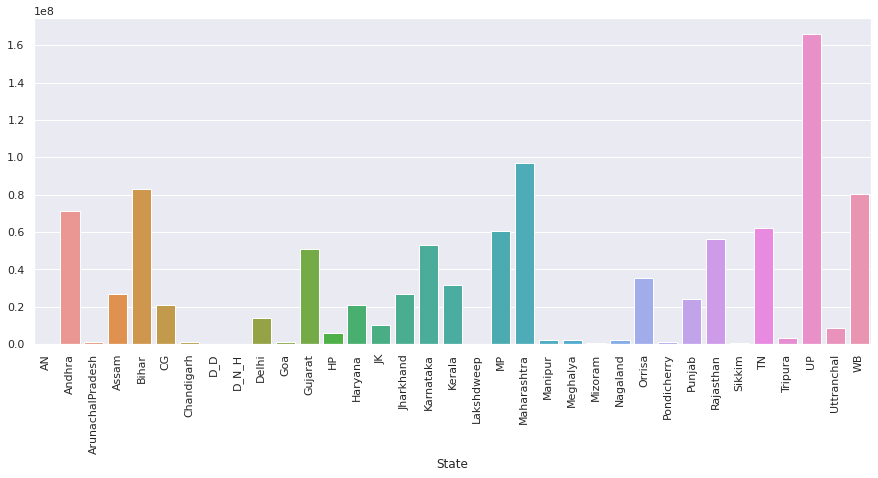

In [ ]:
sns.barplot(x=total_pop_state.index, y= total_pop_state.values);
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.xticks(rotation=90);

Plotting Total Population grouped by each State, and colored by gender

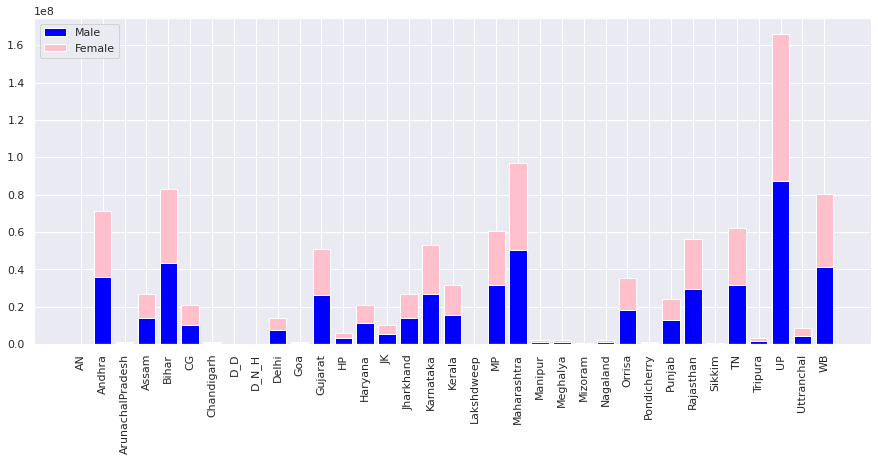

In [ ]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.xticks(rotation=90);
plt.bar(total_pop_state_males.index, total_pop_state_males.values, color='Blue')
plt.bar(total_pop_state_females.index, total_pop_state_females.values, bottom=total_pop_state_males.values, color='Pink')
plt.legend(['Male', 'Female'])

Number of Households plotted, per state, districtwise

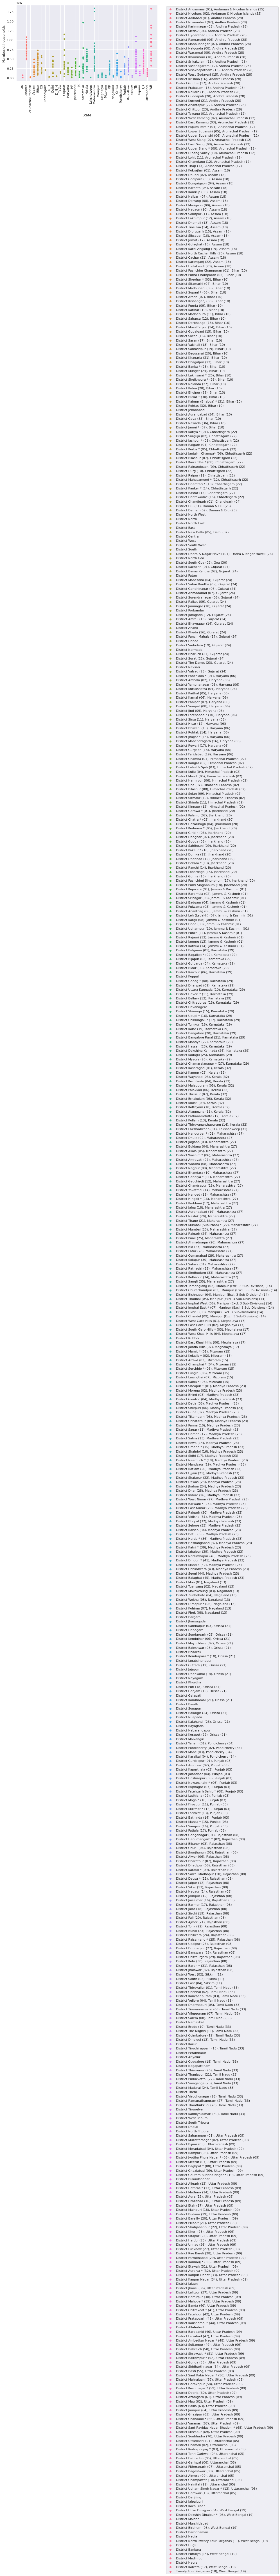

In [ ]:
sns.scatterplot(x='State', y='Number.of.households', data=census_data, hue='District')
plt.legend(bbox_to_anchor=(1.05,1));
plt.xticks(rotation=90);

Fraction of Population grouped by State distributed in Rural and Urban

In [ ]:
census_data.Rural= census_data.Rural.astype('int')
census_data.Urban= census_data.Urban.astype('int')

In [ ]:
rural_Population_Fraction= census_data.groupby('State').Rural.sum()/census_data.groupby('State').Persons.sum()
urban_Population_Fraction= census_data.groupby('State').Urban.sum()/census_data.groupby('State').Persons.sum()
ru_pop_df= pd.DataFrame({
    'x': rural_Population_Fraction.values,
    'y': urban_Population_Fraction.values
}, index= rural_Population_Fraction.index)

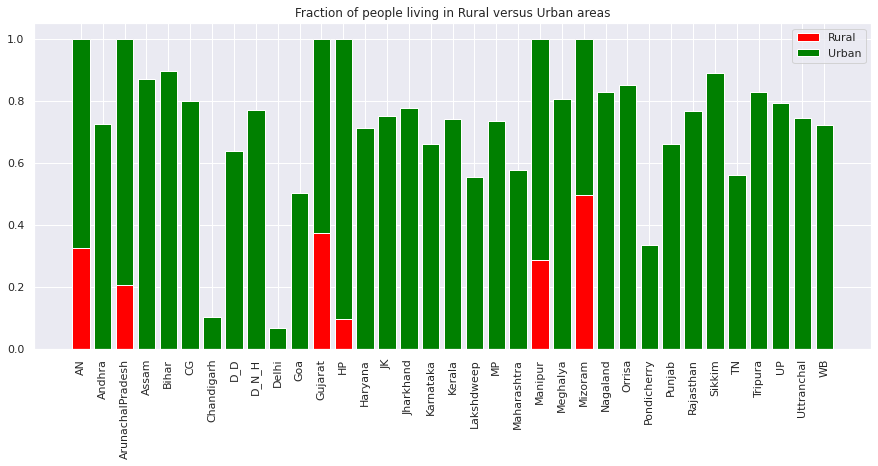

In [ ]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(ru_pop_df.index, ru_pop_df.x, color='Red');
plt.bar(ru_pop_df.index, ru_pop_df.x, bottom=ru_pop_df.y, color='Green');
plt.title('Fraction of people living in Rural versus Urban areas');
plt.legend(['Rural', 'Urban']);
plt.xticks(rotation=90);

Sorting fraction of population statewise, by their education level.

In [ ]:
census_data.head(5)

,Unnamed: 0,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,...,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,0,0,70167.0,4.0,844.0,959.0,2904,0.92,226600,131223,95377,82.49,87.36,76.62,226600.0,1623.0,48339.0,62233.0,49731.0,50748.0,13909.0,27505.0,64496.0,204928.0,17155.0,116631,100683,15948,197453,No Scheduled Castes in this area,0.0,...,0,0.0,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,1.Nicobarese,2486,2.Jarawas,240,3.Onges,96,1.Port Blair (M Cl),99984.0,2.Garacharma (CT),9427.0,3.Bambooflat (CT),6787.0,331.0,331.0,293.0,233.0,148,16,185.0,83,71,1,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,0,0,0,8075.0,5.0,857.0,936.0,26565,63.15,26535,15608,10927,72.35,78.55,65.01,26535.0,346.0,5062.0,8544.0,6439.0,5150.0,994.0,3736.0,8307.0,27535.0,2490.0,19623,12924,6699,22445,No Scheduled Castes in this area,0.0,...,0,0.0,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,1.Nicobarese,26167,2.Shom Pens,398,3.All Scheduled Tribes,26565,No Urban Area,0.0,0,0.0,0,0.0,170.0,169.0,163.0,96.0,93,0,53.0,25,22,0,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,0,0,0,524649.0,5.0,989.0,962.0,416511,16.74,1112189,688072,424117,52.68,64.98,40.30,1112189.0,46680.0,347433.0,305503.0,114789.0,254169.0,43564.0,243389.0,659331.0,1417252.0,168031.0,1123248,912287,210961,1364755,0,154470.0,...,0,73083.0,0,2207843,0,236844,0,24392,1.Gond etc.,200944,2.Sugalis etc.,103303,3.Kolam etc.,45437,0,109529.0,0,75254.0,(M),70381.0,1586.0,1585.0,1580.0,1585.0,0,0,1521.0,429,196,0,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,0,0,0,484588.0,5.0,1017.0,958.0,165735,7.07,1044788,642996,401792,52.02,64.91,39.48,1044788.0,43604.0,288554.0,304556.0,106517.0,249549.0,51926.0,216402.0,567129.0,1382370.0,179784.0,1159606,971911,187695,1186079,1.Madiga,168229.0,...,3.Gosangi,9760.0,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,1.Sugalis etc.,142355,2.Gond etc.,13971,3.Yerukulas,5409,1.Nizamabad (M),288722.0,2.Bodhan (M),71520.0,3.Kamareddy (M),64496.0,854.0,854.0,854.0,854.0,0,0,839.0,417,256,0,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,5,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,0,0,0,813797.0,4.0,998.0,961.0,90636,2.6,1661089,1013328,647761,54.90,67.09,42.75,1661089.0,57595.0,445208.0,478883.0,189226.0,409110.0,81001.0,302570.

In [ ]:
educationDataWithoutLevel= census_data.groupby('State')['Data.without.level'].sum()/census_data.groupby('State')['Total.Educated'].sum()
educationDataBelowPrimaryLevel= census_data.groupby('State')['Below.Primary'].sum()/census_data.groupby('State')['Total.Educated'].sum()
educationDataPrimaryLevel= census_data.groupby('State')['Primary'].sum()/census_data.groupby('State')['Total.Educated'].sum()
educationDataMiddleLevel= census_data.groupby('State')['Middle'].sum()/census_data.groupby('State')['Total.Educated'].sum()
educationDataMatricHSSDiplomaLevel= census_data.groupby('State')['Matric.Higher.Secondary.Diploma'].sum()/census_data.groupby('State')['Total.Educated'].sum()
educationDataGraduateLevel= census_data.groupby('State')['Graduate.and.Above'].sum()/census_data.groupby('State')['Total.Educated'].sum()

In [ ]:
education_DF= pd.DataFrame({
    'educationDataWithoutLevel': educationDataWithoutLevel.values,
    'educationDataBelowPrimaryLevel' : educationDataBelowPrimaryLevel.values,
    'educationDataPrimaryLevel': educationDataPrimaryLevel.values,
    'educationDataMiddleLevel': educationDataMiddleLevel.values,
    'educationDataMatricHSSDiplomaLevel': educationDataMatricHSSDiplomaLevel.values,
    'educationDataGraduateLevel': educationDataGraduateLevel.values
}, index= educationDataGraduateLevel.index)


Plotting the fraction of population statewise, by their education level.

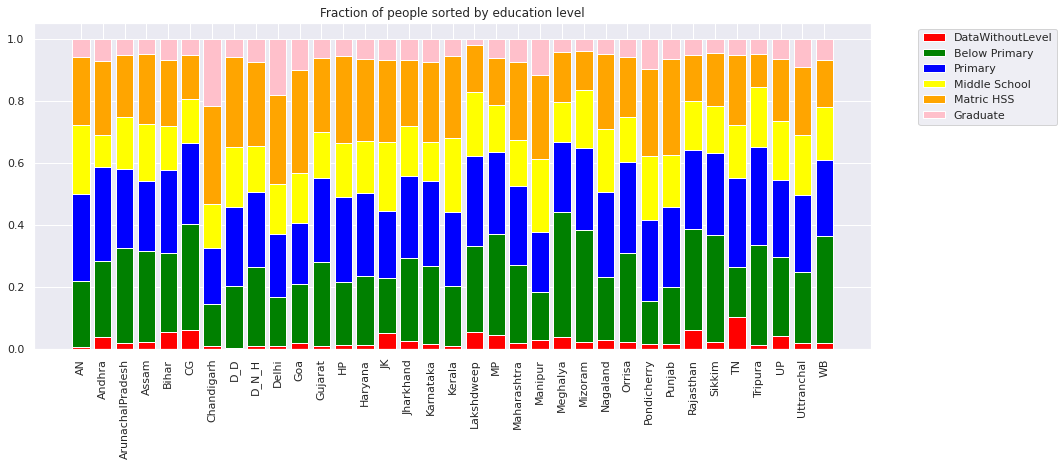

In [ ]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(education_DF.index, education_DF.educationDataWithoutLevel , color='Red');
plt.bar(education_DF.index, education_DF.educationDataBelowPrimaryLevel , bottom=education_DF.educationDataWithoutLevel, color='Green');
plt.bar(education_DF.index, education_DF.educationDataPrimaryLevel , bottom=education_DF.educationDataWithoutLevel+education_DF.educationDataBelowPrimaryLevel, color='Blue');
plt.bar(education_DF.index, education_DF.educationDataMiddleLevel , bottom=education_DF.educationDataWithoutLevel+education_DF.educationDataBelowPrimaryLevel+education_DF.educationDataPrimaryLevel, color='Yellow');
plt.bar(education_DF.index, education_DF.educationDataMatricHSSDiplomaLevel , bottom=education_DF.educationDataWithoutLevel+education_DF.educationDataBelowPrimaryLevel+education_DF.educationDataPrimaryLevel+education_DF.educationDataMiddleLevel, color='Orange');
plt.bar(education_DF.index, education_DF.educationDataGraduateLevel , bottom=education_DF.educationDataWithoutLevel+education_DF.educationDataBelowPrimaryLevel+education_DF.educationDataPrimaryLevel+education_DF.educationDataMiddleLevel+education_DF.educationDataMatricHSSDiplomaLevel, color='Pink');
plt.title('Fraction of people sorted by education level');
plt.legend(['DataWithoutLevel', 'Below Primary', 'Primary', 'Middle School', 'Matric HSS', 'Graduate'], bbox_to_anchor=(1.05, 1));
plt.xticks(rotation=90);

Percentage of BUS SERVICES available in each state, grouped statewise. Pie chart plotted.

In [ ]:
count= census_data.groupby('State')['Bus.services'].count();

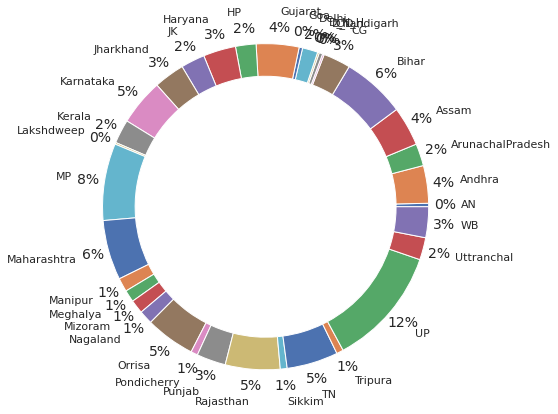

In [ ]:
plt.pie(count, wedgeprops=dict(width=0.3),radius=1.5, labels= count.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debjithore/indian-census-study-project-debjithore


'https://jovian.ai/debjithore/indian-census-study-project-debjithore'

## Asking and Answering Questions





#### In this section we will try and ask some generic questions based on the data we have been working with and try answering the same with the inferences drawn from the data.

#### Q1: How does every states' person literacy rate compare with the male and female literacy rate of that particular state?

In [ ]:
census_data.head(5)

,Unnamed: 0,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,...,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,0,0,70167.0,4.0,844.0,959.0,2904,0.92,226600,131223,95377,82.49,87.36,76.62,226600.0,1623.0,48339.0,62233.0,49731.0,50748.0,13909.0,27505.0,64496.0,204928.0,17155.0,116631,100683,15948,197453,No Scheduled Castes in this area,0.0,...,0,0.0,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,1.Nicobarese,2486,2.Jarawas,240,3.Onges,96,1.Port Blair (M Cl),99984.0,2.Garacharma (CT),9427.0,3.Bambooflat (CT),6787.0,331.0,331.0,293.0,233.0,148,16,185.0,83,71,1,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,0,0,0,8075.0,5.0,857.0,936.0,26565,63.15,26535,15608,10927,72.35,78.55,65.01,26535.0,346.0,5062.0,8544.0,6439.0,5150.0,994.0,3736.0,8307.0,27535.0,2490.0,19623,12924,6699,22445,No Scheduled Castes in this area,0.0,...,0,0.0,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,1.Nicobarese,26167,2.Shom Pens,398,3.All Scheduled Tribes,26565,No Urban Area,0.0,0,0.0,0,0.0,170.0,169.0,163.0,96.0,93,0,53.0,25,22,0,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,0,0,0,524649.0,5.0,989.0,962.0,416511,16.74,1112189,688072,424117,52.68,64.98,40.30,1112189.0,46680.0,347433.0,305503.0,114789.0,254169.0,43564.0,243389.0,659331.0,1417252.0,168031.0,1123248,912287,210961,1364755,0,154470.0,...,0,73083.0,0,2207843,0,236844,0,24392,1.Gond etc.,200944,2.Sugalis etc.,103303,3.Kolam etc.,45437,0,109529.0,0,75254.0,(M),70381.0,1586.0,1585.0,1580.0,1585.0,0,0,1521.0,429,196,0,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,0,0,0,484588.0,5.0,1017.0,958.0,165735,7.07,1044788,642996,401792,52.02,64.91,39.48,1044788.0,43604.0,288554.0,304556.0,106517.0,249549.0,51926.0,216402.0,567129.0,1382370.0,179784.0,1159606,971911,187695,1186079,1.Madiga,168229.0,...,3.Gosangi,9760.0,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,1.Sugalis etc.,142355,2.Gond etc.,13971,3.Yerukulas,5409,1.Nizamabad (M),288722.0,2.Bodhan (M),71520.0,3.Kamareddy (M),64496.0,854.0,854.0,854.0,854.0,0,0,839.0,417,256,0,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,5,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,0,0,0,813797.0,4.0,998.0,961.0,90636,2.6,1661089,1013328,647761,54.90,67.09,42.75,1661089.0,57595.0,445208.0,478883.0,189226.0,409110.0,81001.0,302570.

In [ ]:
persons_LiteracyRateState= census_data.groupby('State')['Persons..literacy.rate'].mean()


In [ ]:
persons_LiteracyRateStateMale= census_data.groupby('State')['Males..Literatacy.Rate'].mean()
persons_LiteracyRateStateFemale= census_data.groupby('State')['Females..Literacy.Rate'].mean()

In [ ]:
fractionMalesEducatedStateWise= persons_LiteracyRateStateMale/persons_LiteracyRateState
fractionFemalesEducatedStateWise= persons_LiteracyRateStateFemale/persons_LiteracyRateState

study_pop_df= pd.DataFrame({
    'x': fractionMalesEducatedStateWise.values,
    'y': fractionFemalesEducatedStateWise.values
}, index= fractionMalesEducatedStateWise.index)

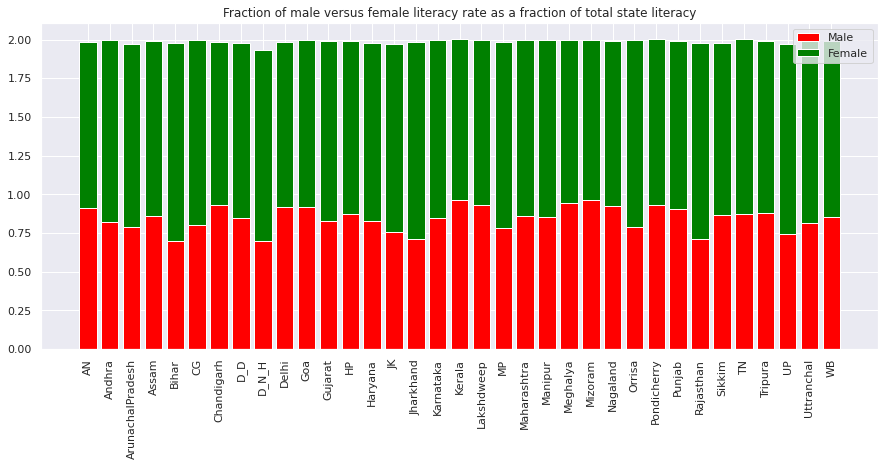

In [ ]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(study_pop_df.index, study_pop_df.x, color='Red');
plt.bar(study_pop_df.index, study_pop_df.x, bottom=study_pop_df.y, color='Green');
plt.title('Fraction of male versus female literacy rate as a fraction of total state literacy');
plt.legend(['Male', 'Female']);
plt.xticks(rotation=90);

**As can be observed, in most states the average female literacy rate is more compared to the male count.**

---



---



#### Q2: How does every states' safe drinking water facility count compare to the total drinking water facility count?

In [ ]:
drinkingWaterFacilityState= census_data.groupby('State')['Drinking.water.facilities'].mean()
safeDrinkingWaterFacilityState= census_data.groupby('State')['Safe.Drinking.water'].mean()
fractionSafeDrinkingWater= safeDrinkingWaterFacilityState/drinkingWaterFacilityState

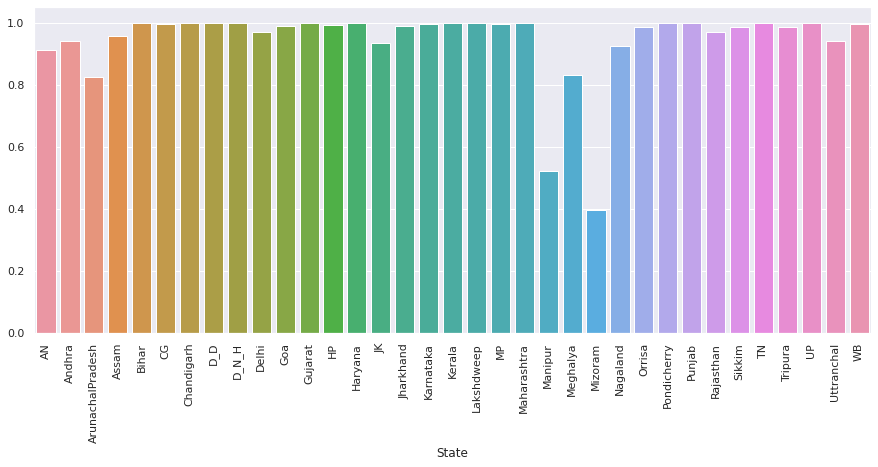

In [ ]:
sns.barplot(x=fractionSafeDrinkingWater.index, y= fractionSafeDrinkingWater.values);
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.xticks(rotation=90);

**According, to the pie plot, the states have sufficient fraction of safe drinking water facilites out of total available water facilites. Except the states of Manipur, Meghalaya and Mizoram.**

---



---



#### Q3: Is there any clear correlation between Paved Approach Roads and Bus Services available in a region?





In [ ]:
census_data['Paved.approach.road']=pd.to_numeric(census_data['Paved.approach.road'], downcast='float', errors= 'coerce')

In [ ]:
census_data['Bus.services']= pd.to_numeric(census_data['Bus.services'], downcast='float')

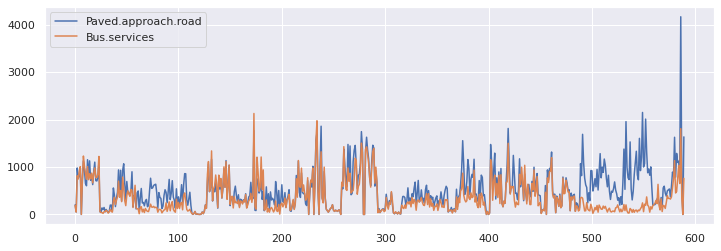

In [ ]:
ax= census_data.plot(y='Paved.approach.road', figsize= (12,4));
census_data.plot(y='Bus.services', ax=ax);

**As we can see over the entire dataset of 590 rows, there is no clear correlation between the presence of 'Paved Approach Roads' and 'Bus Services' in some particular districts of some states. However in some places the paved roads clearly translate to the availability of bus services**
<br>
We use a panda inbuilt plot function in this case


---



---



#### Q4: How does the religion demoraphic vary from one state to another. Which state has the maximum population for each religion?

In [ ]:
census_data.head()

,Unnamed: 0,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,...,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,0,0,70167.0,4.0,844.0,959.0,2904,0.92,226600,131223,95377,82.49,87.36,76.62,226600.0,1623.0,48339.0,62233.0,49731.0,50748.0,13909.0,27505.0,64496.0,204928.0,17155.0,116631,100683,15948,197453,No Scheduled Castes in this area,0.0,...,0,0.0,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,1.Nicobarese,2486,2.Jarawas,240,3.Onges,96,1.Port Blair (M Cl),99984.0,2.Garacharma (CT),9427.0,3.Bambooflat (CT),6787.0,331.0,331.0,293.0,233.0,148,16,185.0,83,71,1,102,16,78,161.0,187.0,201.0,243,28.7,39.1,32.0
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,0,0,0,8075.0,5.0,857.0,936.0,26565,63.15,26535,15608,10927,72.35,78.55,65.01,26535.0,346.0,5062.0,8544.0,6439.0,5150.0,994.0,3736.0,8307.0,27535.0,2490.0,19623,12924,6699,22445,No Scheduled Castes in this area,0.0,...,0,0.0,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,1.Nicobarese,26167,2.Shom Pens,398,3.All Scheduled Tribes,26565,No Urban Area,0.0,0,0.0,0,0.0,170.0,169.0,163.0,96.0,93,0,53.0,25,22,0,38,4,31,36.0,49.0,51.0,111,28.0,33.3,38.7
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,0,0,0,524649.0,5.0,989.0,962.0,416511,16.74,1112189,688072,424117,52.68,64.98,40.30,1112189.0,46680.0,347433.0,305503.0,114789.0,254169.0,43564.0,243389.0,659331.0,1417252.0,168031.0,1123248,912287,210961,1364755,0,154470.0,...,0,73083.0,0,2207843,0,236844,0,24392,1.Gond etc.,200944,2.Sugalis etc.,103303,3.Kolam etc.,45437,0,109529.0,0,75254.0,(M),70381.0,1586.0,1585.0,1580.0,1585.0,0,0,1521.0,429,196,0,976,61,432,558.0,814.0,979.0,544,53.0,39.9,7.0
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,0,0,0,484588.0,5.0,1017.0,958.0,165735,7.07,1044788,642996,401792,52.02,64.91,39.48,1044788.0,43604.0,288554.0,304556.0,106517.0,249549.0,51926.0,216402.0,567129.0,1382370.0,179784.0,1159606,971911,187695,1186079,1.Madiga,168229.0,...,3.Gosangi,9760.0,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,1.Sugalis etc.,142355,2.Gond etc.,13971,3.Yerukulas,5409,1.Nizamabad (M),288722.0,2.Bodhan (M),71520.0,3.Kamareddy (M),64496.0,854.0,854.0,854.0,854.0,0,0,839.0,417,256,0,614,50,330,602.0,746.0,760.0,82,52.8,37.6,9.6
4,5,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,0,0,0,813797.0,4.0,998.0,961.0,90636,2.6,1661089,1013328,647761,54.90,67.09,42.75,1661089.0,57595.0,445208.0,478883.0,189226.0,409110.0

In [ ]:
hindu_Religion_1= census_data[census_data['Religeon.1.Name']=='1.Hindus'].groupby('State')['Religeon.1.Population'].sum()
muslim_Religion_1 = census_data[census_data['Religeon.1.Name']=='1.Muslims'].groupby('State')['Religeon.1.Population'].sum()
christian_Religion_1= census_data[census_data['Religeon.1.Name']=='1.Christians'].groupby('State')['Religeon.1.Population'].sum()

In [ ]:
hindu_Religion_2= census_data[census_data['Religeon.2.Name']=='2.Hindus'].groupby('State')['Religeon.2.Population'].sum()
muslim_Religion_2 = census_data[census_data['Religeon.2.Name']=='2.Muslims'].groupby('State')['Religeon.2.Population'].sum()
christian_Religion_2= census_data[census_data['Religeon.2.Name']=='2.Christians'].groupby('State')['Religeon.2.Population'].sum()

In [ ]:
hindu_Religion_3= census_data[census_data['Religeon.3.Name']=='3.Hindus'].groupby('State')['Religeon.3.Population'].sum()
muslim_Religion_3 = census_data[census_data['Religeon.3.Name']=='3.Muslims'].groupby('State')['Religeon.3.Population'].sum()
christian_Religion_3= census_data[census_data['Religeon.3.Name']=='3.Christians'].groupby('State')['Religeon.3.Population'].sum()

In [ ]:
total_Hindu= hindu_Religion_1.add(hindu_Religion_2, fill_value=0)
total_Hindu=total_Hindu.add(hindu_Religion_3, fill_value=0)

In [ ]:
total_Muslims= muslim_Religion_1.add(muslim_Religion_2, fill_value=0)
total_Muslims=total_Muslims.add(muslim_Religion_3, fill_value=0)

In [ ]:
total_Christians= christian_Religion_1.add(christian_Religion_2, fill_value=0)
total_Christians=total_Christians.add(christian_Religion_3, fill_value=0)

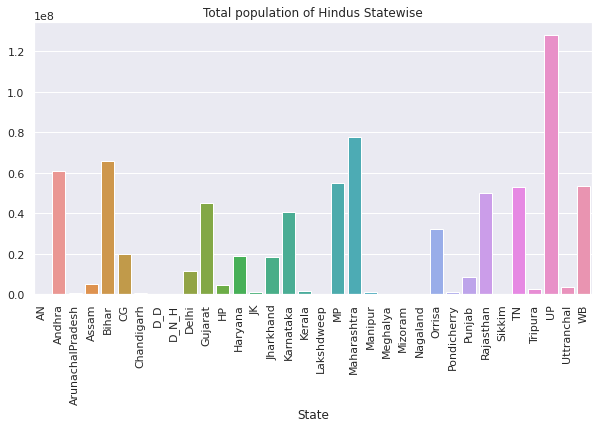

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y= total_Hindu.values, x= total_Hindu.index, ax=ax )
plt.xticks(rotation=90)
plt.title('Total population of Hindus Statewise')
plt.show()

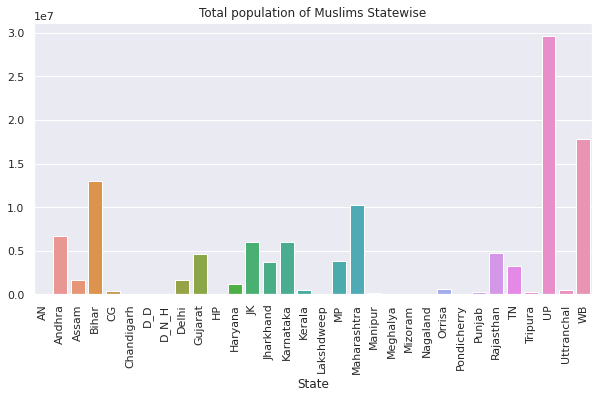

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y= total_Muslims.values, x= total_Muslims.index, ax=ax )
plt.xticks(rotation=90)
plt.title('Total population of Muslims Statewise')
plt.show()

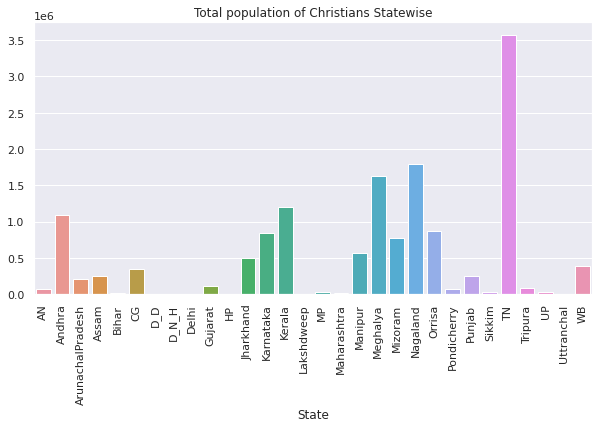

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y= total_Christians.values, x= total_Christians.index, ax=ax )
plt.xticks(rotation=90)
plt.title('Total population of Christians Statewise')
plt.show()

**As we can see from the above plots the total Hindu population is maximum in UP, followed by Maharashta and Bihar, whereas the Muslim population peaks in the states of UP, and WB. Christians on the other hand are mostly located in the states of Tamil Nadu and Nagaland.**


---



---



#### Q5: What is the population growth in each state between 1999-2001?

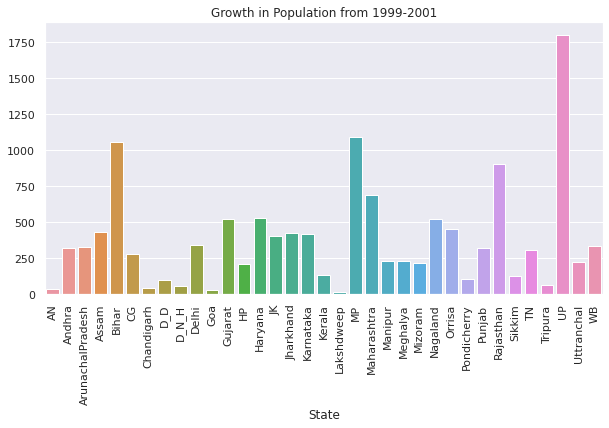

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
census_data['Growth..1991...2001.']=pd.to_numeric(census_data['Growth..1991...2001.'], errors='coerce')
data=census_data.groupby('State')['Growth..1991...2001.'].sum()



sns.barplot(x=data.index, y= data.values)
plt.xticks(rotation=90)
plt.title('Growth in Population from 1999-2001')
plt.show()

**UP had the maximum jump in population whereas Lakshwadeep, Goa and AN showed slowest growth rate**


---



---



Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debjithore/indian-census-study-project-debjithore


'https://jovian.ai/debjithore/indian-census-study-project-debjithore'

## Inferences and Conclusion

From studying this really diverse data which pertains to the even more diversified population of our country India, we could get an insight into varied data, ranging from literacy rates, availability of drinking water, the maximum education level, sorted by districts, states and regions. 
This was an extensive and fun dataset to work with.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debjithore/indian-census-study-project-debjithore


'https://jovian.ai/debjithore/indian-census-study-project-debjithore'

## References and Future Work

Using this dataset we can further analyse the other fields or aspects of the data that has been looked over in this current work because of limited opportunity to explore the data.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debjithore/indian-census-study-project-debjithore


'https://jovian.ai/debjithore/indian-census-study-project-debjithore'